In [ ]:
# --- Jupyter Starter Pack ---

# autoreload: refresh code on every cell run
%reload_ext autoreload
%autoreload 2

# clean warnings
import warnings
warnings.filterwarnings("ignore")

# nicer printing
from pprint import pprint

# numpy / pandas nicer display
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# matplotlib defaults
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120

# tqdm in notebooks
from tqdm.notebook import tqdm

# optional: make exceptions show only the important frame
%config InlineBackend.figure_format = "retina"

In [1]:
%%writefile cnet.py

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

Overwriting cnet.py


In [2]:
import torch
import torch.nn as nn

from cnet import Net
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

batch_size = 64
lr = 1e-3
epochs = 5
device = "cuda" if torch.cuda.is_available() else "cpu"

transform = transforms.Compose([
	transforms.ToTensor(),
])

train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=batch_size)

model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(epochs):
    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss = loss_fn(logits, y)

        opt.zero_grad()
        loss.backward()
        opt.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    print(f"Epoch {epoch+1}: test acc = {correct/total:.4f}", end="\r")

torch.save(model.state_dict(), "cnet.pt")

tensor(0., device='cuda:0') tensor(1., device='cuda:0')


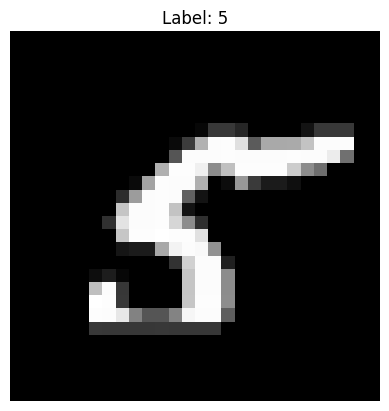

In [13]:
import matplotlib.pyplot as plt

# get exactly one batch
x, y = next(iter(train_loader))
x, y = x.to(device), y.to(device)
print(x.min(), x.max()	)

# pick one image (index 0)
img = x[0].cpu()

# if it's a single-channel image (e.g., MNIST) squeeze channel
if img.shape[0] == 1:
    img = img.squeeze(0)

plt.imshow(img.permute(1, 2, 0) if img.dim() == 3 else img, cmap='gray')
plt.title(f"Label: {y[0].item()}")
plt.axis('off')
plt.show()